In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Law of Large Numbers

We can simulate a large number of values for X.

In [31]:
n = 100000

In [32]:
np.random.seed(51)
die_1 = np.random.randint(1,7, size=n)

In [33]:
np.random.seed(81)
die_2 = np.random.randint(1,7, size=n)

In [34]:
X = die_1 + die_2

In [35]:
df = pd.DataFrame({'die_1':die_1, 'die_2':die_2, 'X':X})
df.head(10)

,die_1,die_2,X
0,2,4,6
1,6,2,8
2,1,1,2
3,2,4,6
4,6,4,10
5,1,4,5
6,6,2,8
7,5,2,7
8,2,6,8
9,6,3,9


In [36]:
total_four = len(df[df.X == 4])
total_four

8207

In [37]:
p = total_four/len(df)
p

0.08207

In [38]:
freq = df.X.value_counts()
freq

7     16559
8     13959
6     13787
9     11157
5     11093
10     8414
4      8207
3      5605
11     5598
12     2850
2      2771
Name: X, dtype: int64

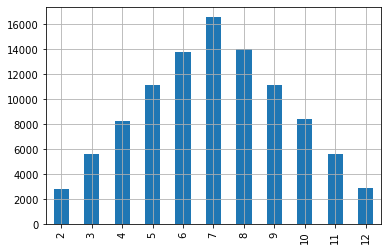

In [42]:
%matplotlib inline
freq.sort_index().plot(kind='bar', grid=True);

In [43]:
prob = df.X.value_counts() / n
prob

7     0.16559
8     0.13959
6     0.13787
9     0.11157
5     0.11093
10    0.08414
4     0.08207
3     0.05605
11    0.05598
12    0.02850
2     0.02771
Name: X, dtype: float64

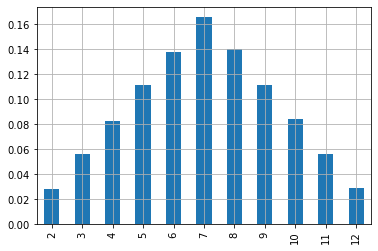

In [44]:
prob.sort_index().plot(kind='bar', grid=True);

In [45]:
prob_n = df.X.value_counts(normalize=True)
prob_n

7     0.16559
8     0.13959
6     0.13787
9     0.11157
5     0.11093
10    0.08414
4     0.08207
3     0.05605
11    0.05598
12    0.02850
2     0.02771
Name: X, dtype: float64

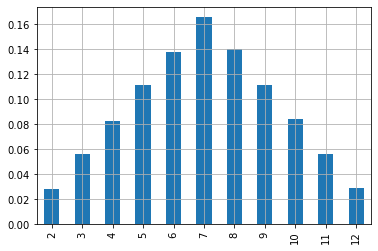

In [46]:
prob_n.sort_index().plot(kind='bar', grid=True);

## Binomial Distribution
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 3.40**

The probability that a patient recovers from a stomach disease is 0.8. 

Suppose 20 people are known to have contracted this disease. 

What is the probability that

a. exactly 14 recover?

this is P(X=14)

In [8]:
n = 20
p = 0.8
k = 14

In [9]:
stats.binom.pmf(k, n, p)

0.10909970097304983

b. at least 10 recover?

this is P(X≥10)=P(10)+P(11)+P(12)+...+P(20)

In [15]:
x = 9

In [16]:
1 - stats.binom.cdf(x, n, p)

0.9994365863023398

c. at least 14 but not more than 18 recover?

this is P(14≤X≤18)=P(14)+P(15)+...+P(18)

In [93]:
x1 = 13
x2 = 18

In [94]:
a = stats.binom.cdf(x1, n, p)
a

0.08669251356740021

In [95]:
b = stats.binom.cdf(x2, n, p)
b

0.9308247097235891

In [96]:
c = b-a
c

0.844132196156189

d. at most 16 recover?

this is P(X≤16)=1−P(X>16)=P(17)+P(18)+P(19)+P(20)

In [100]:
x = 16

In [101]:
stats.binom.cdf(x, n, p)

0.5885511380434305

e. Construct discrete probability distribution table and draw a graph

In [102]:
dist = []
for i in range(n+1):
    dist.append(stats.binom.pmf(i,n,p))
    print(str(i) + '\t' + str(stats.binom.pmf(i,n,p)))

0	1.048576000000001e-14
1	8.388607999999975e-13
2	3.187671040000001e-11
3	7.650410495999974e-10
4	1.3005697843199945e-08
5	1.6647293239295892e-07
6	1.664729323929588e-06
7	1.3317834591436803e-05
8	8.656592484433902e-05
9	0.000461684932503141
10	0.002031413703013826
11	0.007386958920050259
12	0.022160876760150803
13	0.0545498504865252
14	0.10909970097304983
15	0.17455952155687976
16	0.21819940194610007
17	0.2053641430080944
18	0.13690942867206304
19	0.05764607523034236
20	0.011529215046068481


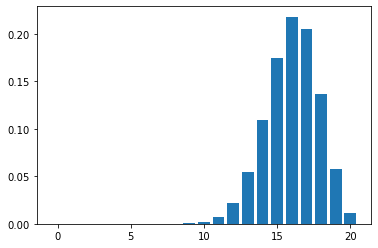

In [103]:
plt.bar(list(range(n+1)), dist);

## Poisson Distribution
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

Suppose that a random system of police patrol is devised so that a patrol officer may visit a given beat location Y = 0, 1, 2, 3, . . . times per half-hour period, with each location being visited an average of once per time period. 

Assume that Y possesses, approximately, a Poisson probability distribution. 

Calculate the probability that the patrol officer will miss a given location during a half-hour period. 

What is the probability that it will be visited once? 

Twice? 

At least once?

In [105]:
# For this example the time period is a half-hour, and the mean number of 
# visits per half-hour interval is λ = 1. Then

mu = 1

P(Y = 0) = ?

In [106]:
stats.poisson.pmf(0, mu)

0.36787944117144233

P(Y = 1) = ?

In [107]:
stats.poisson.pmf(1, mu)

0.36787944117144233

P(Y = 2) = ?

In [108]:
stats.poisson.pmf(2, mu)

0.18393972058572114

P(Y ≥ 1) = ?

In [109]:
1 - stats.poisson.pmf(0, mu)

0.6321205588285577

In [110]:
# y >= 3
1 - stats.poisson.cdf(2, mu)

0.08030139707139416